In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import csv

base_url = "https://habr.com/ru/flows/develop/articles/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)  Chrome/110.0.0.0 Safari/537.36"
}

all_articles = 0
max_page = 50
data = []


for page in range(1, max_page +1 ):
    if page == 1:
        url = base_url
    else:
        url = f"{base_url}page{page}/"
    print(f"parse: {url}")

    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"error {url}: {response.status_code}")
        break

    soup = bs(response.text, "html.parser")
    articles = soup.find_all("article", class_="tm-articles-list__item")

    for article in articles:
        all_articles += 1
        title_tag = article.find("h2")
        title = title_tag.text.strip() if title_tag else "Название не найдено"

        reading_time_tag = article.find("span", class_="tm-article-reading-time__label")
        reading_time = reading_time_tag.text.strip() if reading_time_tag else "Время не указано"

        views_tag = article.find("span", class_="tm-data-icons__item")
        views = views_tag.text.strip() if views_tag else "Просмотры не указаны"

        keywords = []
        keyword_tags = article.find_all("a", class_="tm-publication-hub__link")
        for keyword in keyword_tags:
            keywords.append(keyword.text.strip())

        link_tag = title_tag.find("a")
        article_url = "https://habr.com" + link_tag["href"] if link_tag else "Ссылка не найдена"

        article_response = requests.get(article_url, headers=headers)
        if article_response.status_code == 200:
            article_soup = bs(article_response.text, "html.parser")
            paragprah_tag = article_soup.find("p")
            paragprah = paragprah_tag.text.strip() if paragprah_tag else "Текст не найден"
        else:
            paragprah = "Ошибка"


        print(f"article {all_articles}:")
        print(f"name: {title}")
        print(f"time: {reading_time}")
        print(f"views: {views}")
        print(f"text: {paragprah}")
        print(f"keywords: {', '.join(keywords)}")
        print(f"link: {article_url}")
        print("-" * 50)
        print(f"total: {all_articles}")



        data.append({
            "name": title,
            "time": reading_time,
            "views": views,
            "text": paragprah,
            "keywords": ", ".join(keywords),
            "link": article_url
        })
        csv_filename = "habr_articles.csv"
        with open(csv_filename, mode="w", encoding="utf-8", newline="") as file:
            writer = csv.DictWriter(file, fieldnames=["name", "time", "views","text", "keywords", "link"])
            writer.writeheader()
            writer.writerows(data)

print(f"saved {csv_filename}")

Парсим страницу: https://habr.com/ru/flows/develop/articles/
article 1:
name: Отбираем хлеб у нативных разработчиков: миграция с Kotlin/Swift на RN
time: 6 мин
views: Количество просмотров9
text: Меня зовут Александр Чернов, я фронтенд-разработчик в KODE и я использую React Native в разработке мобильных приложений уже более семи лет. Сейчас расскажу вам, как мы у нативных разработчиков хлеб отбирали.
keywords: React Native*, Kotlin*, Swift*, Разработка мобильных приложений*
link: https://habr.com/ru/articles/865962/
--------------------------------------------------
total: 1
article 2:
name: Личный VPN: юзер ликует, VLESS смеётся, а РКН плачет
time: 6 мин
views: Количество просмотров108
text: Эта статья — расширенный туториал того, как установить и настроить свой VPN на VLESS с XTLS-Reality с управлением через GUI интерфейс 3x-UI всего за 10 минут.
keywords: Информационная безопасность*, Геоинформационные сервисы*, Хостинг, Системное администрирование*, DIY или Сделай сам
link: https:/

KeyboardInterrupt: 

                                                name    time  \
0  Отбираем хлеб у нативных разработчиков: миграц...   6 мин   
1  Личный VPN: юзер ликует, VLESS смеётся, а РКН ...   6 мин   
2  DevOps Challenge: помогите Деду Морозу с опове...   2 мин   
3               Как на самом деле работает Attention   8 мин   
4                   Рекурсивные запросы в SQLAlchemy  17 мин   

                      views  \
0    Количество просмотров9   
1  Количество просмотров108   
2   Количество просмотров15   
3   Количество просмотров58   
4   Количество просмотров46   

                                                text  \
0  Меня зовут Александр Чернов, я фронтенд-разраб...   
1  Эта статья — расширенный туториал того, как ус...   
2  Привет! Я Саша Хренников, руководитель DevOps-...   
3  Хотите наладить разметку данных с помощью LLM ...   
4                                           Введение   

                                            keywords  \
0  React Native*, Kotlin*, Swift*, 

<ipython-input-10-24c41d4fd177>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_freq, x="Частота", y="Слово", palette="viridis")


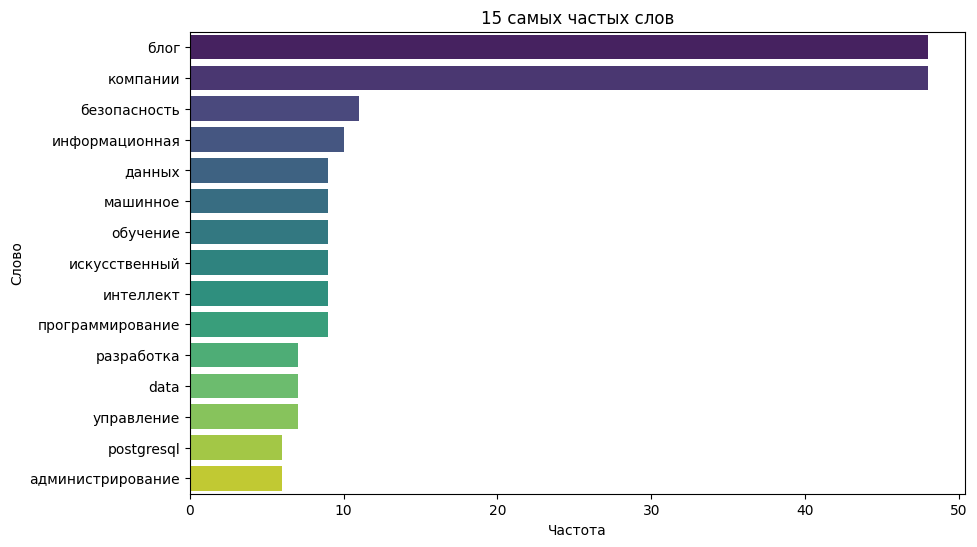

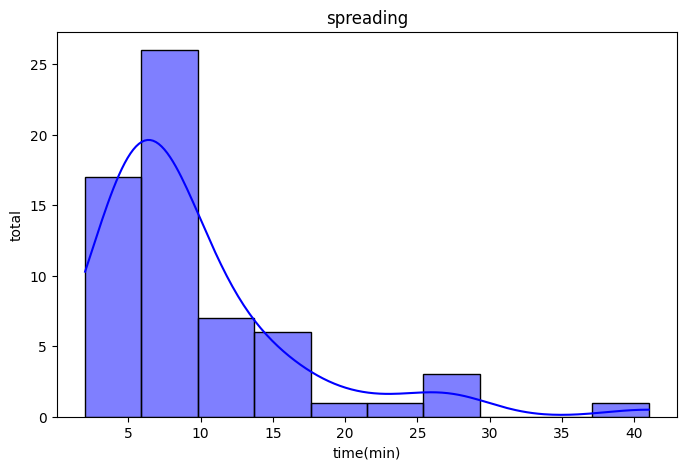

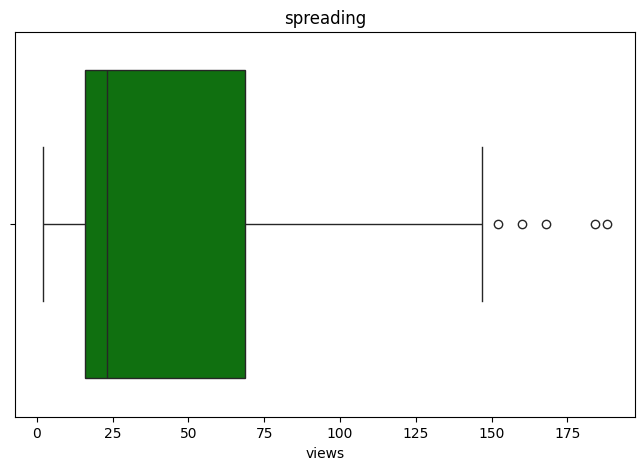

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

data = pd.read_csv("/content/sample_data/habr_articles.csv")

print(data.head())
data_cleaned = data.dropna(subset=["name", "link"])
data_cleaned = data_cleaned[data_cleaned["name"] != "error"]

print(f"Очищенные данные: {data_cleaned.shape[0]} записей")
all_text = " ".join(data_cleaned["name"]) + " " + " ".join(data_cleaned["keywords"])
all_text = re.sub(r"[^\w\s]", "", all_text)

words = all_text.lower().split()
stop_words = set(["и", "в", "на", "с", "по", "для", "о", "это", "как", "что", "из", "быть", "или", "не"])

words_filtered = [word for word in words if word not in stop_words]
word_counts = Counter(words_filtered)

print("10 самых частых слов:")
print(word_counts.most_common(10))

word_freq = pd.DataFrame(word_counts.most_common(15), columns=["Слово", "Частота"])

plt.figure(figsize=(10, 6))
sns.barplot(data=word_freq, x="Частота", y="Слово", palette="viridis")
plt.title("15 самых частых слов")
plt.xlabel("Частота")
plt.ylabel("Слово")
plt.show()

data_cleaned["time(min)"] = data_cleaned["time"].str.extract(r"(\d+)").astype(float)


plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned["time(min)"], bins=10, kde=True, color="blue")
plt.title("spreading")
plt.xlabel("time(min)")
plt.ylabel("total")
plt.show()
data_cleaned["views(total)"] = data_cleaned["views"].str.replace(r"[^\d]", "", regex=True).astype(float)

plt.figure(figsize=(8, 5))
sns.boxplot(data=data_cleaned[data_cleaned["views(total)"] <= 200], x="views(total)", color="green")
plt.title("spreading")
plt.xlabel("views")
plt.show()

